#                                                   TASK -2
### ==========================>Prediction using Unsupervised ML<================================
## AIM :  Predict the optimum number of clusters and represent it visually.

# 1-Import Libs

In [24]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

# 2-Load Data

In [27]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df['flower'].unique()

array([0, 1, 2])

# 3-Data Visualization 

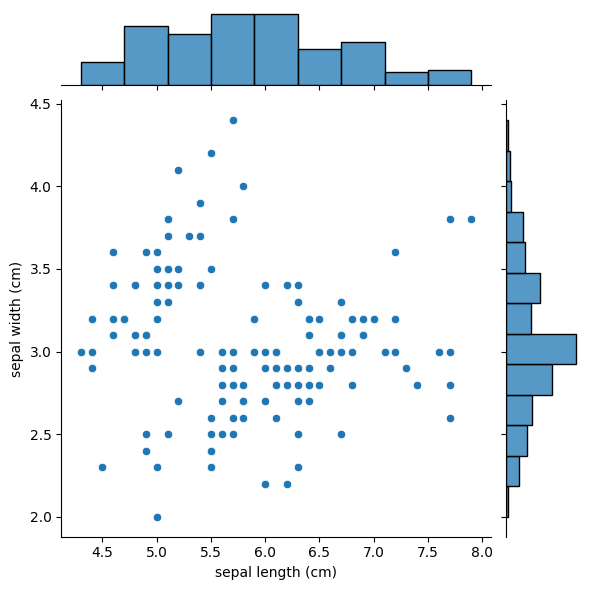

In [30]:
sns.jointplot( x="sepal length (cm)", y="sepal width (cm)",data=df)

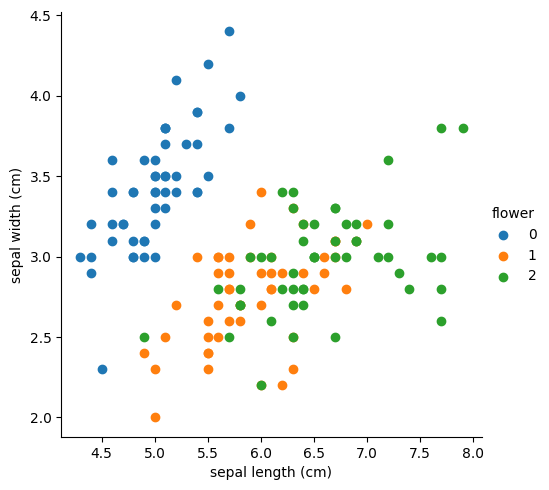

In [35]:
sns.FacetGrid(df, hue='flower', size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

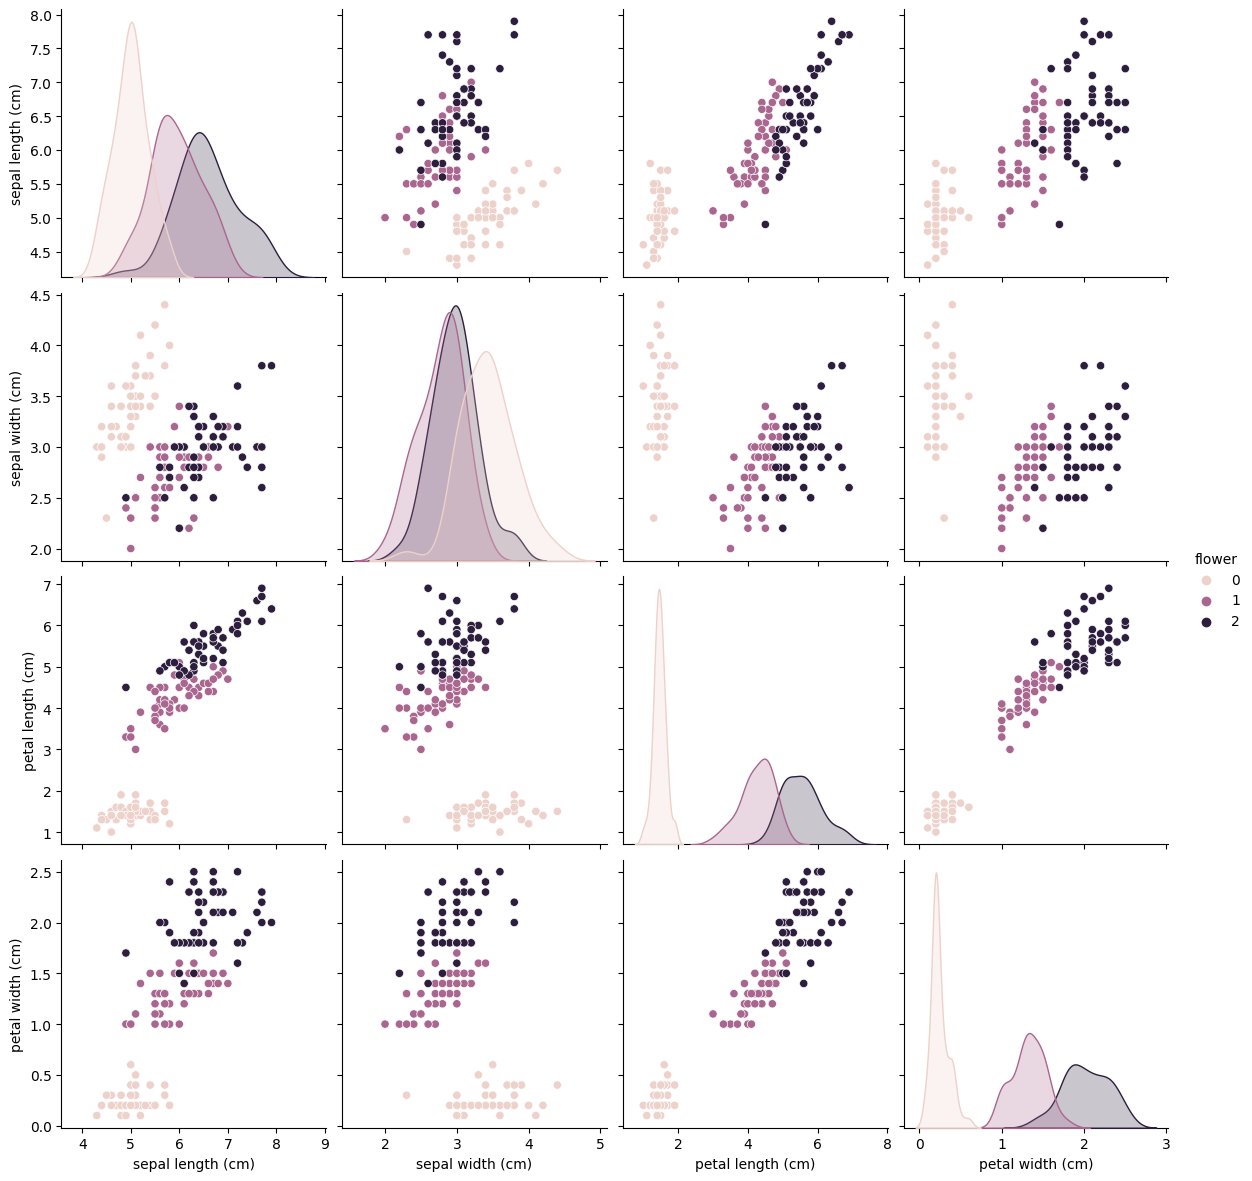

In [36]:
sns.pairplot(df, hue="flower", size=3)

# 4-Clustering

In [54]:
#Elbow Plot
df2=df.drop("flower",axis=1)
x =df2.iloc[:, [0, 1, 2, 3]].values

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2)
    sse.append(km.inertia_)

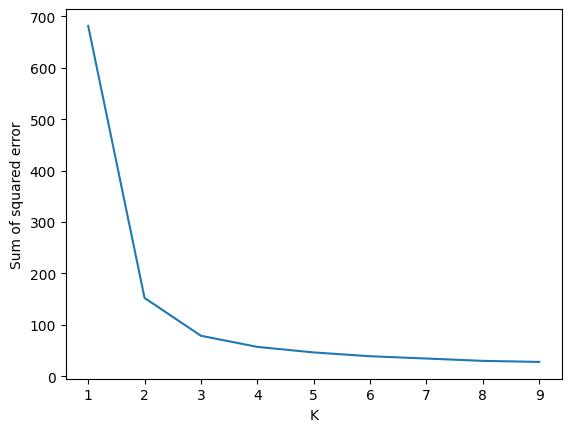

In [55]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [56]:
#Cluster
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

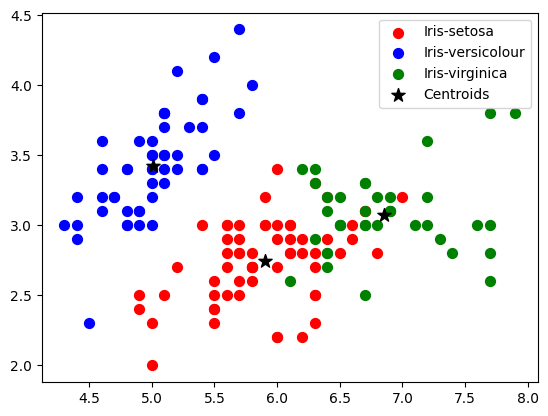

In [62]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black',marker='*', label = 'Centroids')

plt.legend()